In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
from multihist import Hist1d, Histdd
import time
import itertools
import os
import math
from scipy import stats
from straxen import units
from scipy.optimize import curve_fit
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
from scipy.stats import beta, chi2

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu
import cutax

Start import
Working on midway2-0412.rcc.local with the following versions 
and installation paths:
strax
	v1.0.0	/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/strax
straxen
	v1.0.0	/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen



In [2]:
st = cutax.xenonnt_v4(cuts_for=['commissioning.krypton_selections', 'commissioning.commissioning_cuts'])

In [3]:
dsets = st.select_runs(include_tags='_sr0_preliminary', run_mode='ambe*',available='event_info')

Checking data availability: 100%|██████████| 3/3 [01:20<00:00, 26.75s/it]


In [4]:
dsets = dsets[(dsets.end > pd.to_datetime('06/03/2021'))]

In [5]:
dsets

name number       mode                     end  \
7472  021463  21463  ambe_link 2021-06-05 07:33:05.423   
7474  021461  21461  ambe_link 2021-06-05 07:30:39.007   
7476  021459  21459  ambe_link 2021-06-05 07:20:13.491   
7478  021457  21457  ambe_link 2021-06-05 07:17:39.811   
7480  021455  21455  ambe_link 2021-06-05 06:47:22.111   
...      ...    ...        ...                     ...   
7641  021294  21294  ambe_link 2021-06-03 14:50:48.536   
7643  021292  21292  ambe_link 2021-06-03 14:20:29.007   
7645  021290  21290  ambe_link 2021-06-03 13:50:07.536   
7647  021288  21288  ambe_link 2021-06-03 13:19:46.517   
7649  021286  21286  ambe_link 2021-06-03 12:48:59.398   

                       start  \
7472 2021-06-05 07:31:31.685   
7474 2021-06-05 07:20:58.727   
7476 2021-06-05 07:17:59.913   
7478 2021-06-05 06:47:38.474   
7480 2021-06-05 06:17:20.828   
...                      ...   
7641 2021-06-03 14:20:45.056   
7643 2021-06-03 13:50:27.180   
7645 2021-06-03 13:20:06.150   
7647 2021-06-03 12:49:44.657   
7649 2021-06-03 12:23:36.681   

                                                   tags  \
7472                                   _sr0_preliminary   
7474                                   _sr0_preliminary   
7476           _sr0_preliminary,ambe_source_top_ccw5d0m   
7478           _sr0_preliminary,ambe_source_top_ccw5d0m   
7480           _sr0_preliminary,ambe_source_top_ccw5d0m   
...                                                 ...   
7641  prioritize,_sr0_preliminary,ambe_source_bottom...   
7643  prioritize,_sr0_preliminary,ambe_source_bottom...   
7645  prioritize,_sr0_preliminary,ambe_source_bottom...   
7647  prioritize,_sr0_preliminary,ambe_source_bottom...   
7649                                   _sr0_preliminary   

                   livetime  raw_records_available  peak_basics_available  \
7472 0 days 00:01:33.738000                  False                   True   
7474 0 days 00:09:40.280000                  False                   True   
7476 0 days 00:02:13.578000                  False                   True   
7478 0 days 00:30:01.337000                  False                   True   
7480 0 days 00:30:01.283000                  False                   True   
...                     ...                    ...                    ...   
7641 0 days 00:30:03.480000                  False                   True   
7643 0 days 00:30:01.827000                  False                   True   
7645 0 days 00:30:01.386000                  False                   True   
7647 0 days 00:30:01.860000                  False                   True   
7649 0 days 00:25:22.717000                  False                   True   

      event_info_available  
7472                  True  
7474                  True  
7476                  True  
7478                  True  
7480                  True  
...                    ...  
7641                  True  
7643                  True  
7645                  True  
7647                  True  
7649                  True  

[87 rows x 10 columns]

In [6]:
AmBe_runs = np.array(dsets['name'])

In [7]:
AmBe_runs

array(['021463', '021461', '021459', '021457', '021455', '021453',
       '021451', '021449', '021447', '021445', '021443', '021441',
       '021439', '021437', '021435', '021433', '021431', '021429',
       '021427', '021425', '021423', '021421', '021419', '021417',
       '021415', '021413', '021411', '021409', '021407', '021405',
       '021403', '021401', '021399', '021397', '021395', '021393',
       '021391', '021389', '021387', '021385', '021383', '021381',
       '021379', '021377', '021375', '021373', '021371', '021369',
       '021367', '021365', '021363', '021361', '021359', '021357',
       '021355', '021353', '021349', '021347', '021345', '021343',
       '021341', '021339', '021337', '021335', '021333', '021331',
       '021329', '021327', '021325', '021323', '021320', '021318',
       '021316', '021314', '021312', '021310', '021308', '021306',
       '021302', '021300', '021298', '021296', '021294', '021292',
       '021290', '021288', '021286'], dtype=object)

In [3]:
#events = wcu.merge_runs_cutax(st,AmBe_runs)
#events.to_pickle('data/SR0_v4_AmBe_21286_21463_datasets.pkl')
ev = pd.read_pickle('data/SR0_v4_AmBe_21286_21463_datasets.pkl')

In [7]:
cut=(ev['cut_s1_max_pmt'])&(ev['cut_daq_veto'])&(ev['cut_s1_area_fraction_top'])&(ev['cut_s2_single_scatter'])
mask = wcu.basic_cuts(ev) & cut & ev['cut_fiducial_volume']
maskNW, maskFW = wcu.mask_events_near_wire(ev)
#FV4t = (-134.238,-13.6132,60.73**2)
FV4t = (-134.238, -2, 60.73**2)

In [10]:
def analysis(events,title='AmBe data'):
    ddu.plot_area_width_aft(events,title, low = 0, high = 7, low2 = 0, high2 = 1, binning = 500)
    wcu.plot_r2_z(events,title)
    #S2WidthCut_basic = wcu.S2WidthCut_basic(ev[mask],'AmBe data',mod_par=(44.47,0.676,375), perc=(1,99), plot=1)
    S2WidthCut = wcu.S2WidthCut_percentile(events,title,mod_par=(44.47,0.676,375),
                                           perc=(1,99), delta=0.1, dlarge=1., plot=1)

total events 39518
total events 39518 selected events 39518


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


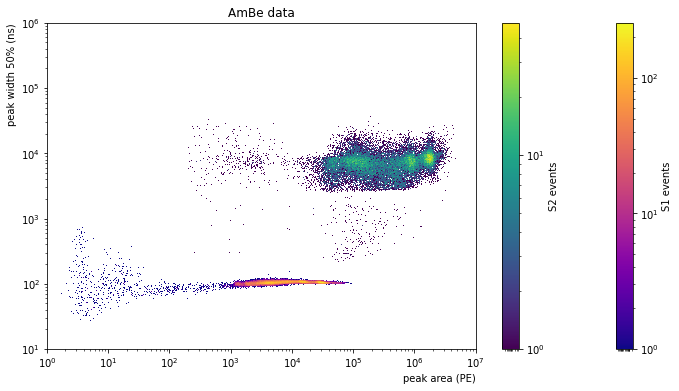

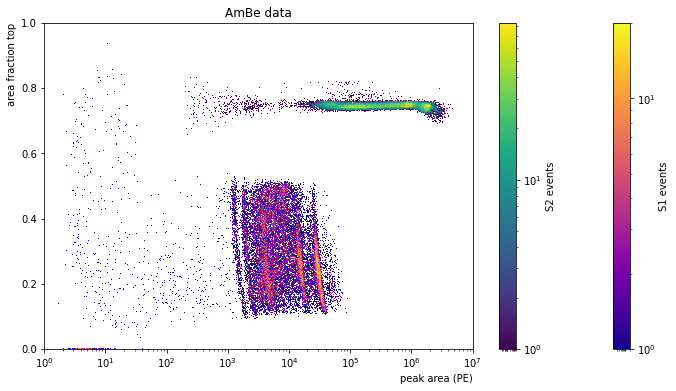

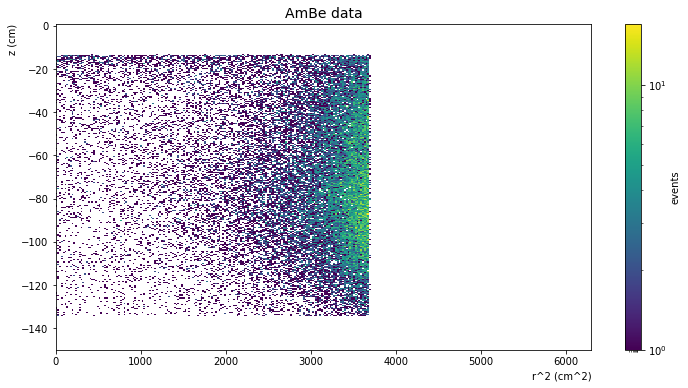

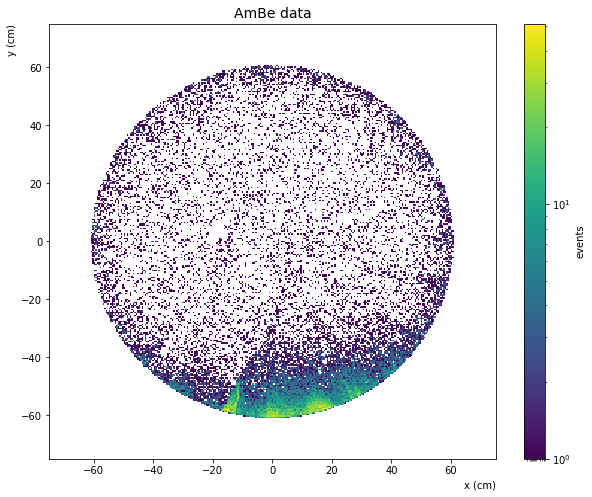

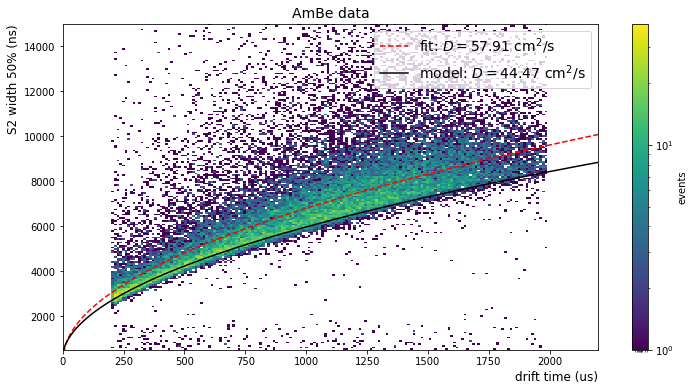

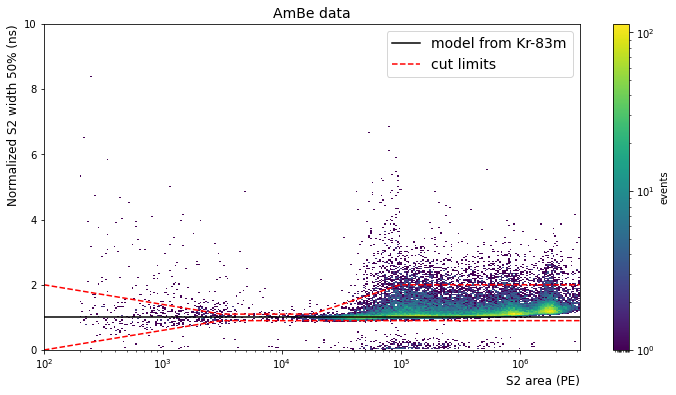

In [11]:
analysis(ev[mask],title='AmBe data')

total events 6926
total events 6926 selected events 6926


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


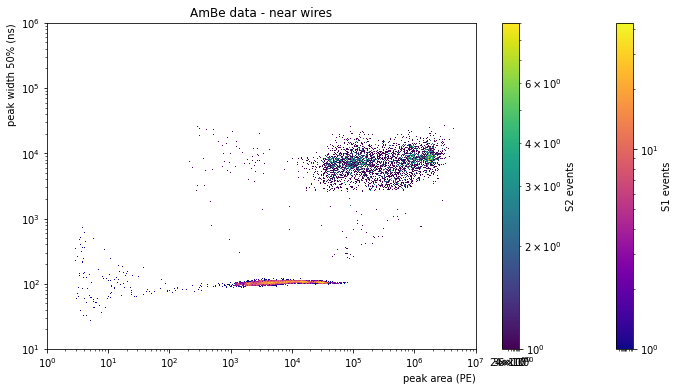

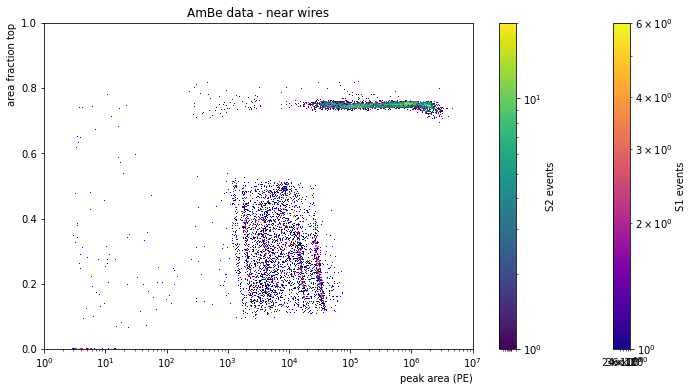

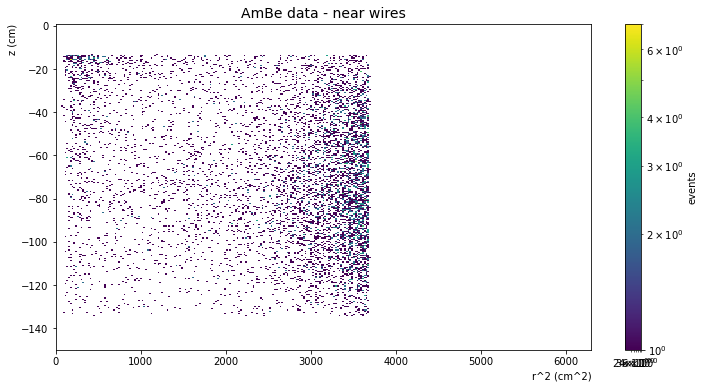

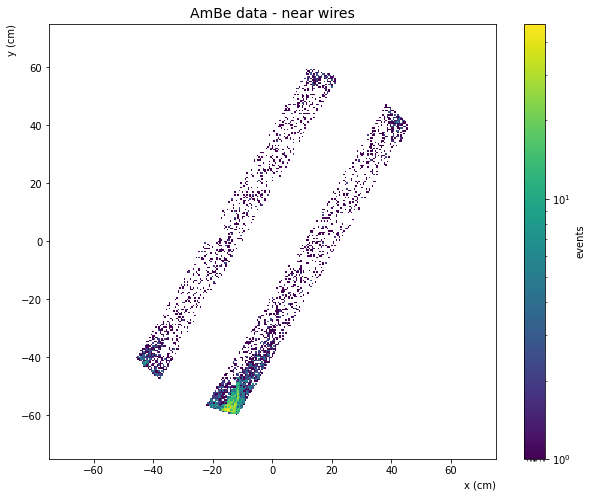

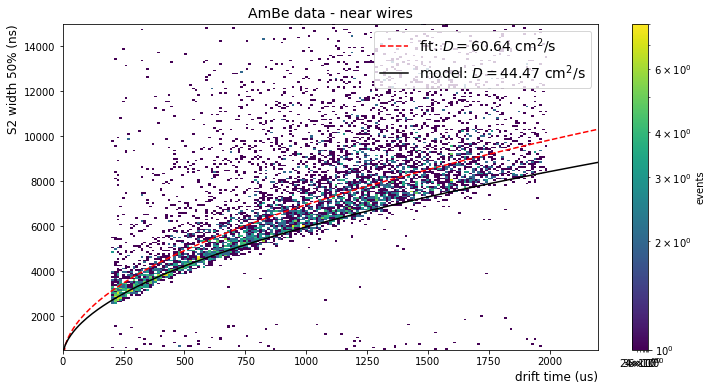

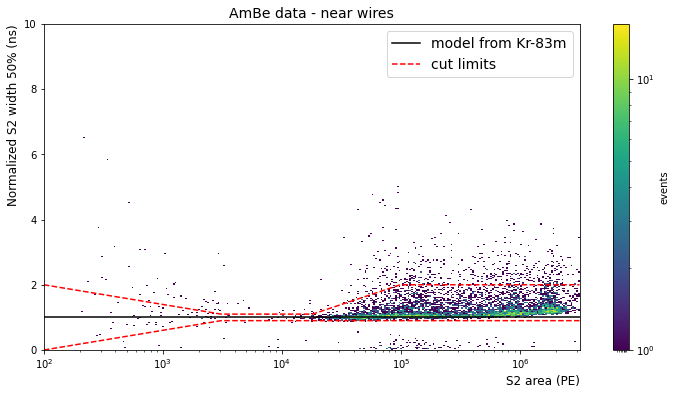

In [12]:
analysis(ev[mask & maskNW],title='AmBe data - near wires')

total events 32592
total events 32592 selected events 32592


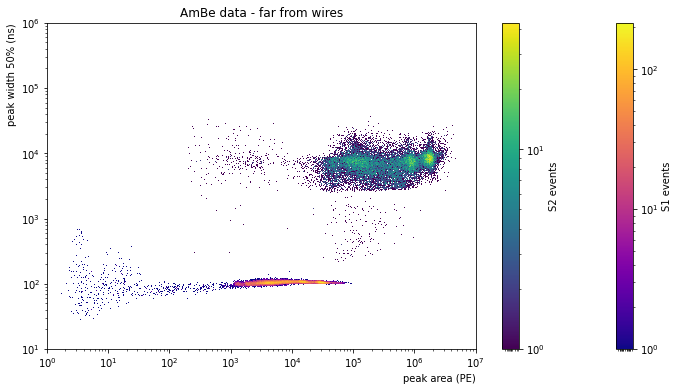

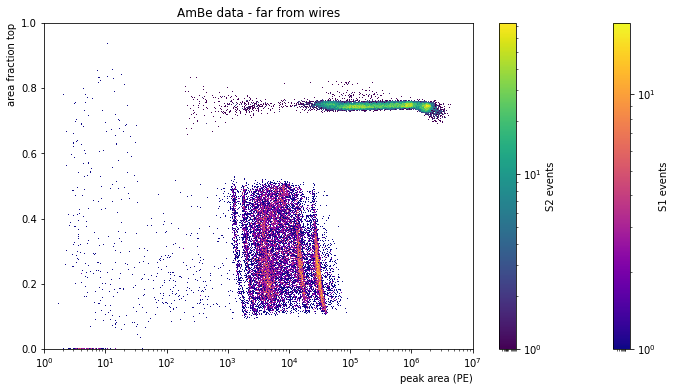

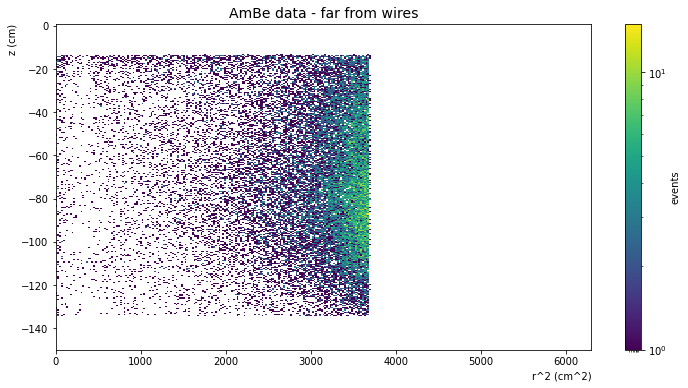

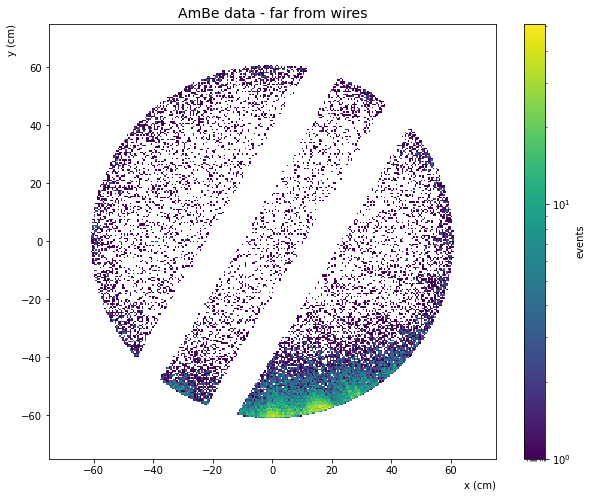

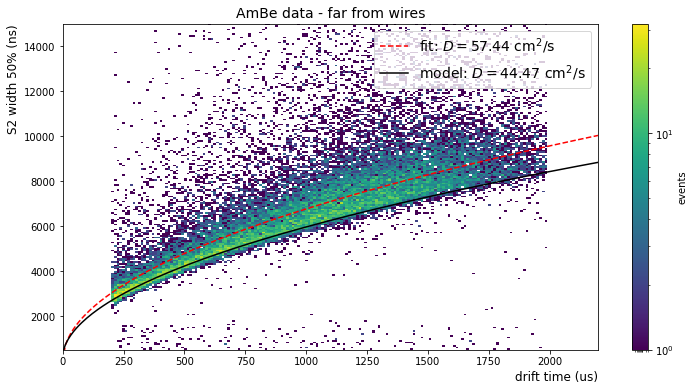

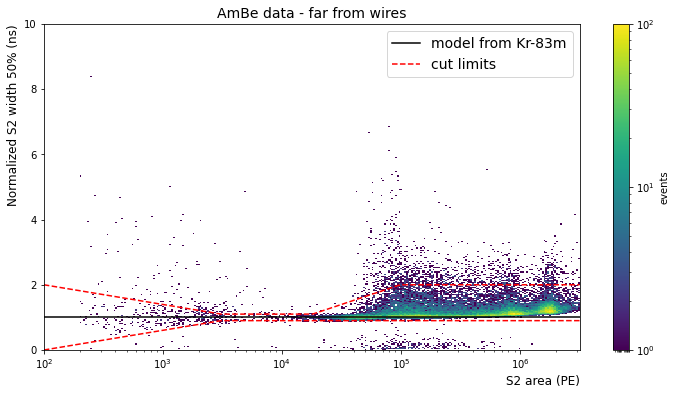

In [13]:
analysis(ev[mask & maskFW],title='AmBe data - far from wires')

total events 4804
total events 4804 selected events 4804


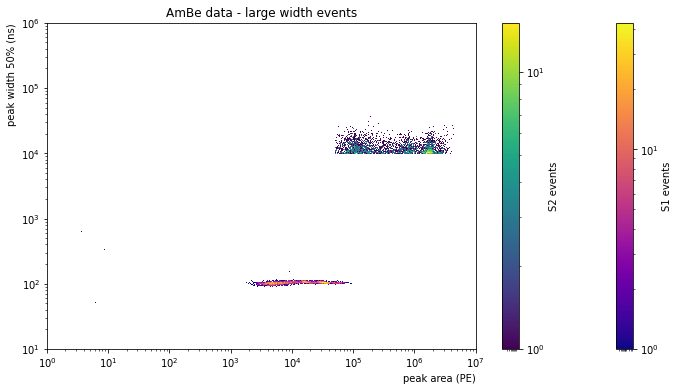

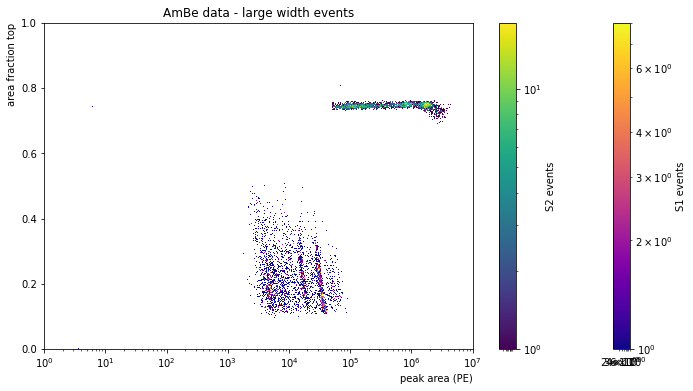

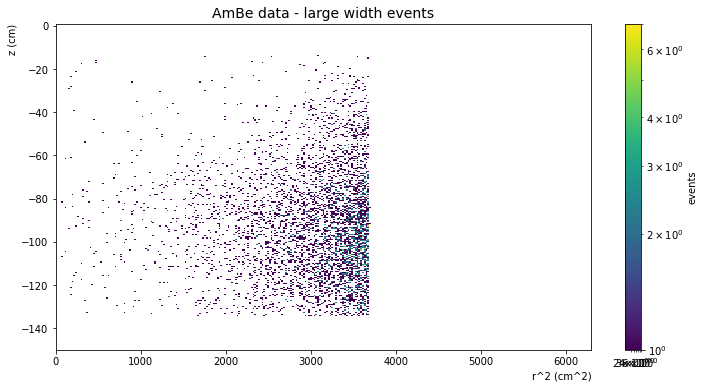

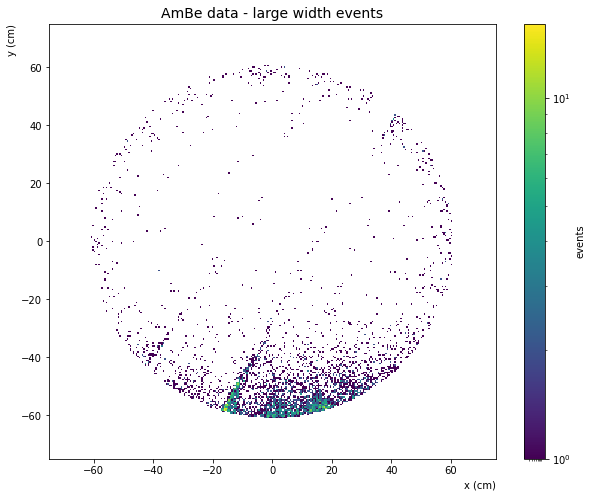

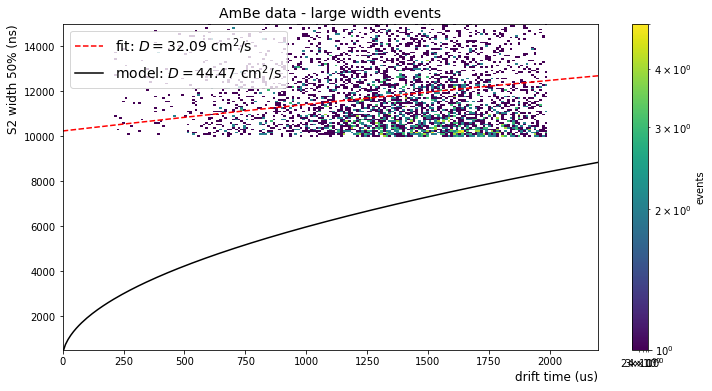

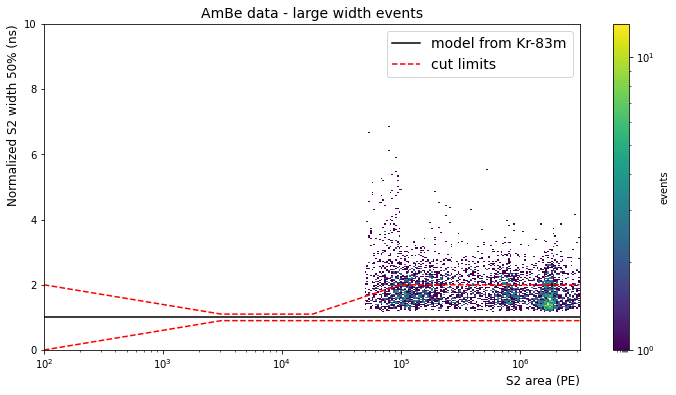

In [14]:
analysis(ev[mask & (ev['s2_area']>5e4)&(ev['s2_range_50p_area']>1e4)],title='AmBe data - large width events')

total events 1190
total events 1190 selected events 1190


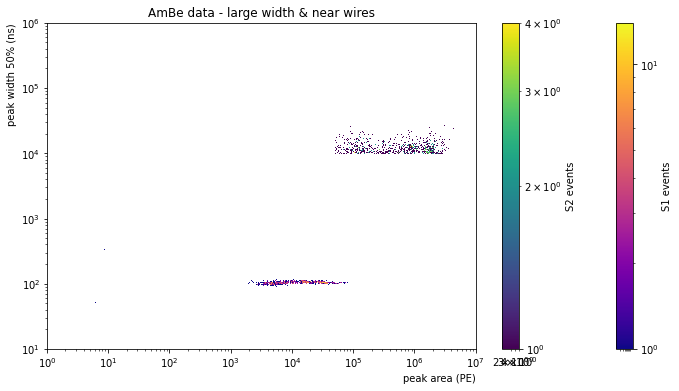

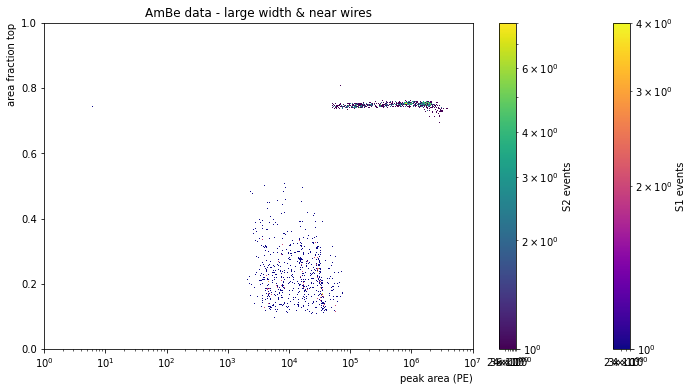

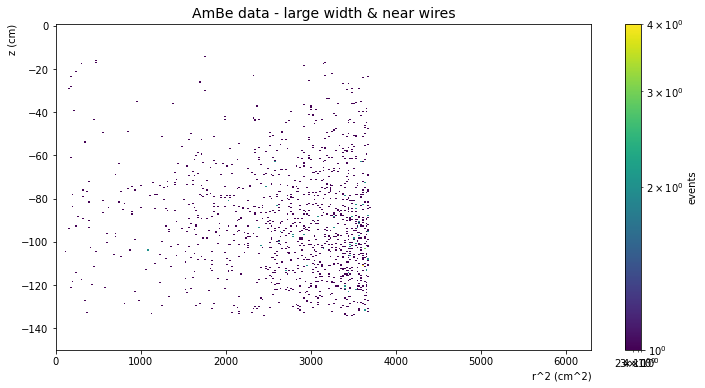

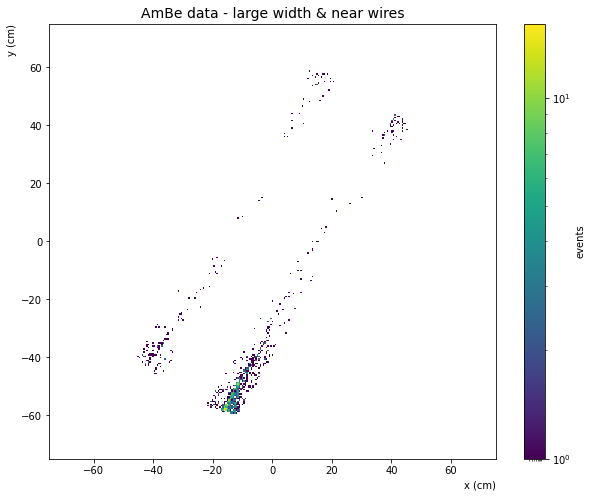

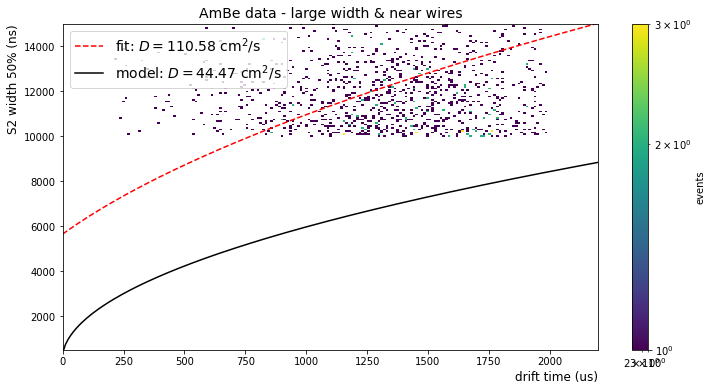

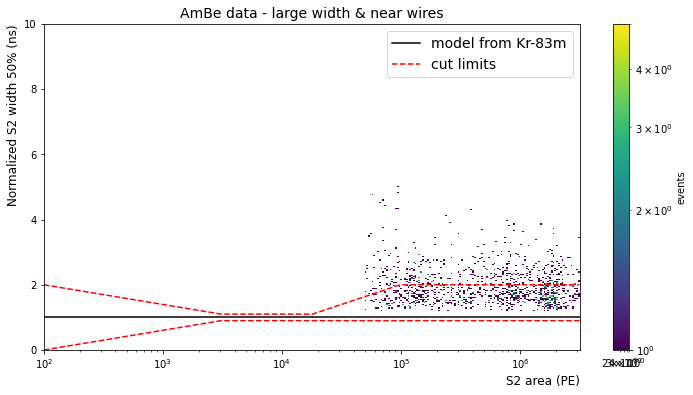

In [15]:
analysis(ev[mask & maskNW & (ev['s2_area']>5e4)&(ev['s2_range_50p_area']>1e4)],title='AmBe data - large width & near wires')

total events 3614
total events 3614 selected events 3614


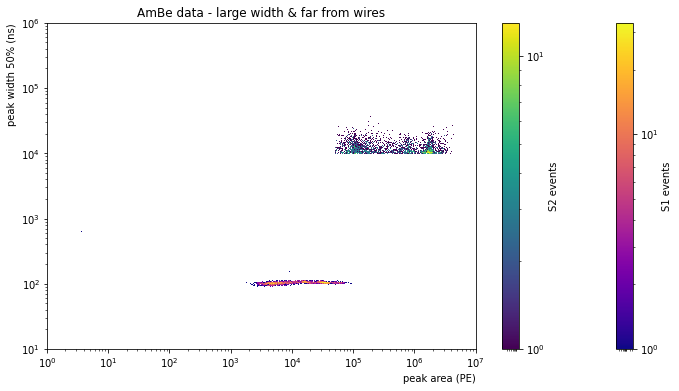

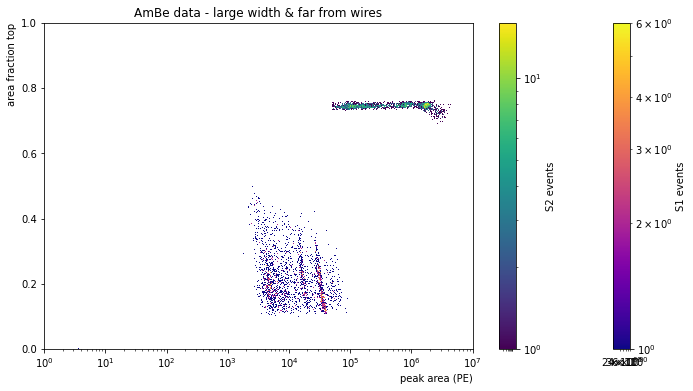

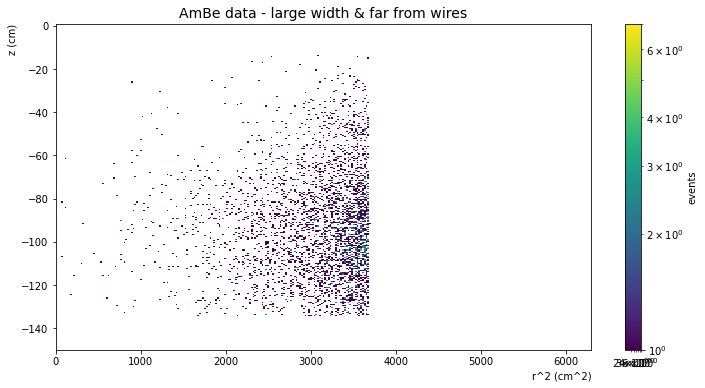

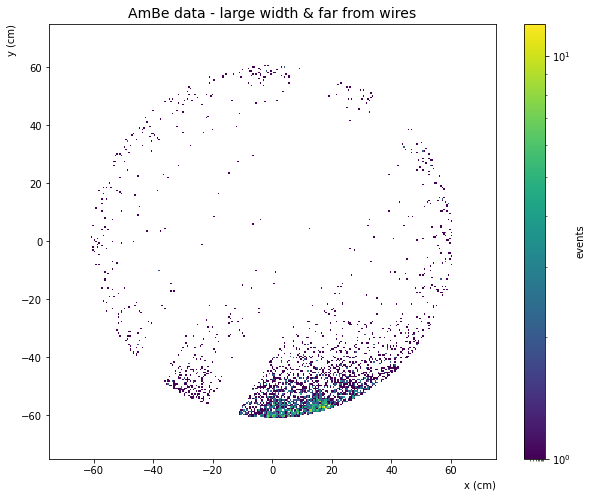

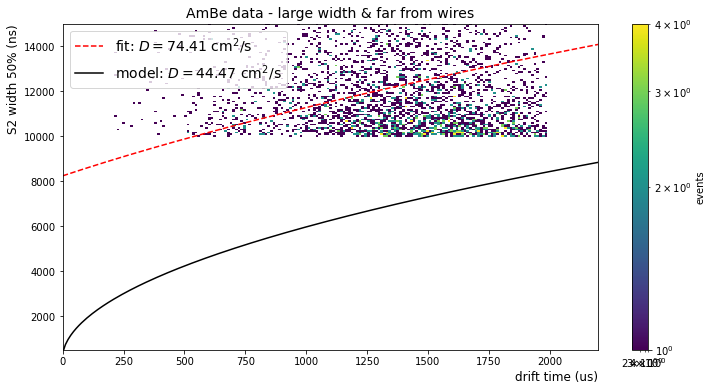

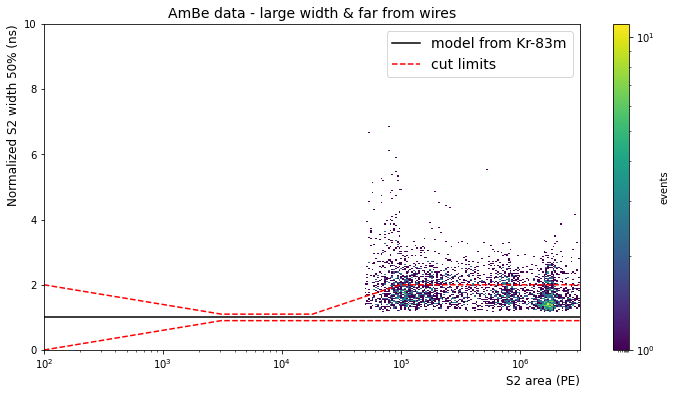

In [16]:
analysis(ev[mask & maskFW & (ev['s2_area']>5e4)&(ev['s2_range_50p_area']>1e4)],title='AmBe data - large width & far from wires')

In [24]:
def display_events(st,run_id='021463',nev=1):
    #display(HTML("<style>.container { width:70% !important; }</style>"))
    ev0 = st.get_array(run_id, ['event_info',
                             'cut_s1_max_pmt',
                             'cut_s1_area_fraction_top',
                             'cut_s2_single_scatter',
                             'cut_s2_width_naive',
                             'cut_fiducial_volume',
                             'cut_daq_veto'])
    cut=(ev0['cut_s1_max_pmt'])&(ev0['cut_daq_veto'])&(ev0['cut_s1_area_fraction_top'])&(ev0['cut_s2_single_scatter'])
    mask = wcu.basic_cuts(ev0) & cut & ev0['cut_fiducial_volume']
    maskNW, maskFW = wcu.mask_events_near_wire(ev0)
    events = ev0[mask]
    print('events before selection',len(ev0),'events after selection',len(events))
    for i in range(nev):
        idx = int(np.random.rand()*len(events))
        fig = st.event_display_interactive(run_id,
                                           time_range=(events[idx]['time'],
                                                       events[idx]['endtime']),
                                           bottom_pmt_array=False)
        bklt.show(fig)

In [25]:
display_events(st,run_id='021463')

Loading plugins: |          | 0.00 % [00:00<?]

events before selection 638 events after selection 9


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/strax/chunk.py:364: NumbaExperimentalFeatureWarning: Record(Reconstructed cnn S2 X position (cm), uncorrected[type=float32;offset=0;title=Reconstructed cnn S2 X position (cm), uncorrected],x_cnn[type=float32;offset=0;title=Reconstructed cnn S2 X position (cm), uncorrected],Reconstructed cnn S2 Y position (cm), uncorrected[type=float32;offset=4;title=Reconstructed cnn S2 Y position (cm), uncorrected],y_cnn[type=float32;offset=4;title=Reconstructed cnn S2 Y position (cm), uncorrected],Start time since unix epoch [ns][type=int64;offset=8;title=Start time since unix epoch [ns]],time[type=int64;offset=8;title=Start time since unix epoch [ns]],Exclusive end time since unix epoch [ns][type=int64;offset=16;title=Exclusive end time since unix epoch [ns]],endtime[type=int64;offset=16;title=Exclusive end time since unix epoch [ns]],Reconstructed mlp S2 X position (cm), uncorrected[type=float32;offset=24;title=Reconstructed

Loading BokehJS ...

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen/analyses/bokeh_waveform_plot.py:561: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)


NameError: name 'bklt' is not defined

In [14]:
wcu.display_events_S2WidthCut(st,AmBe_runs[4], nev = 10, s2_width_cut = True)

run 021455, start 2021-06-05 01:17:20.003368, livetime 1800.93 s, rate: 7.14 Hz, selection rate: 0.16 Hz
total events 12864 selected events 1635
events before width cut 89 events after selection 86 no width cut 3


/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:329: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bin_edges = np.array(bin_edges)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([self.bin_centers(axis=i) for i in range(self.dimensions)])


Loading BokehJS ...

/dali/lgrandi/strax/straxen/straxen/analyses/bokeh_waveform_plot.py:561: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)


/dali/lgrandi/strax/straxen/straxen/analyses/bokeh_waveform_plot.py:561: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)


In [15]:
wcu.display_events_S2WidthCut(st,AmBe_runs[4], nev = 3, s2_width_cut = False)

run 021455, start 2021-06-05 01:17:20.003368, livetime 1800.93 s, rate: 7.14 Hz, selection rate: 0.16 Hz
total events 12864 selected events 1635
events before width cut 89 events after selection 86 no width cut 3


/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:329: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bin_edges = np.array(bin_edges)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([self.bin_centers(axis=i) for i in range(self.dimensions)])
